<font color='#415a77'>

# **The Problem:**

One of the major challenges faced by airports and airlines is the optimization of operations to ensure smooth air traffic, reduce costs, and improve the passenger experience. One of the key performance indicators in this context is the turnaround time.


### **What is Turnaround?**

Turnaround is one of the most critical processes in airport operations, as it directly affects the efficiency, punctuality, and profitability of airlines. This term refers to the time required for an aircraft to complete all ground activities between landing and the next takeoff. The faster and more efficient this process is, the lower the operational costs and the greater the airport’s capacity to handle a higher volume of flights.


### **The Importance of Turnaround:**

Optimizing turnaround reduces delays, improves punctuality, and increases operational efficiency, positively impacting the reputation of both airlines and airports. Moreover, a well-managed turnaround enables better fleet utilization, contributing to the sustainability of the aviation sector.


### **The Challenge:**

In this scenario, there is a need to develop an analytical model capable of identifying which processes may be creating operational bottlenecks and affecting the total ground time, considering various factors such as:

	- Passenger disembarkation/embarkation
	- Baggage removal
	- Aircraft cleaning
	- Restocking of supplies
	- Fuel refueling
	- Maintenance and technical inspections
	- Baggage and cargo loading
	- Passenger boarding
	- Crew change

### **Benefits of Optimizing Turnaround Time:**

	- Delay reduction: With a faster and more efficient operational flow, flights depart on schedule, minimizing impacts on the flight network.
	- Increased operational capacity: Optimized processes allow more flights to be handled without the need for infrastructure expansion.
	- Reduced operational costs: Less ground time means lower expenses with fuel, staff, and airport fees.
	- Improved passenger experience: Faster boarding and disembarkation lead to greater satisfaction and comfort for travelers.
	- Sustainability: Less ground waiting time results in lower carbon emissions, contributing to environmental efficiency.
	- Fleet optimization: With less idle time, aircraft can perform more flights per day, maximizing profitability.
	- Greater predictability: With predictive analysis tools, it’s possible to anticipate and address bottlenecks before they impact operations.

### **Next Steps:**

To solve this problem, the following steps are necessary:

	- Data collection and organization: Gather historical data on airport operations, including records of each process that affects turnaround.
	- Exploratory data analysis: Identify the most important variables and their relationships with turnaround time.
	- Building a predictive model: Use machine learning techniques to develop a model capable of identifying the processes that most affect turnaround time.
	- Model validation: Assess the model’s accuracy using a test dataset.
	- Implementation and monitoring: Integrate the model into a decision-support system and continuously monitor its performance.
	- By implementing a solution to predict taxi time, airports and airlines can optimize their operations, reduce costs, and enhance customer satisfaction.

</font>

# Initial Setup

## Imports

In [2]:
# importing the necessary libraries
#%pip install ydata-profiling
%pip install -q -U watermark

# importing data manipulation libraries
import pandas as pd
import numpy as np

#importing os manipulation libraries
import os

#importing shape library for model interpretability
import shap

# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# importing machine learning libraries
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# importing machine learning models
from sklearn.linear_model import LinearRegression, LogisticRegression
import xgboost as xgb

# importing evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

#importing warnings library
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.


In [3]:
%reload_ext watermark
%watermark -a "Renan Amaral" -u -d -v -p pandas,n

Author: Renan Amaral

Last updated: 2025-08-11

Python implementation: CPython
Python version       : 3.12.7
IPython version      : 8.27.0

pandas: 2.2.2
n     : not installed



In [4]:
# loading the dataset in the folder 'data/raw'
#print(os.getcwd())
df = pd.read_csv('../data/raw/turnaround_data.csv')

In [5]:
df.head()

,flight_number,airline,origin,destination,weather_condition,arrival_time,inblock_time,deboarding_start,deboarding_end,cleaning_start,...,bags_unloading_end,bags_loading_start,bags_loading_end,boarding_start,boarding_end,door_close_time,offblock_time,takeoff_time,turnaround_minutes,delay_minutes
0,LA8319,Latam,POA,SSA,Rain,2025-05-28 17:56:00,2025-05-28 17:57:00,2025-05-28 17:58:00,2025-05-28 18:13:00,2025-05-28 18:15:00,...,2025-05-28 18:17:00,2025-05-28 18:33:00,2025-05-28 18:42:00,2025-05-28 18:44:00,2025-05-28 18:55:00,2025-05-28 18:57:00,2025-05-28 19:00:00,2025-05-28 19:07:00,63,26
1,G31307,Gol,FOR,CGH,Fog,2025-02-01 20:17:00,2025-02-01 20:18:00,2025-02-01 20:20:00,2025-02-01 20:36:00,2025-02-01 20:39:00,...,2025-02-01 20:35:00,2025-02-01 20:58:00,2025-02-01 21:12:00,2025-02-01 21:14:00,2025-02-01 21:49:00,2025-02-01 21:54:00,2025-02-01 21:56:00,2025-02-01 22:02:00,98,60
2,LA8574,Latam,GIG,GRU,Cloudy,2025-02-06 01:23:00,2025-02-06 01:26:00,2025-02-06 01:28:00,2025-02-06 01:44:00,2025-02-06 01:46:00,...,2025-02-06 01:33:00,2025-02-06 01:56:00,2025-02-06 02:01:00,2025-02-06 02:03:00,2025-02-06 02:36:00,2025-02-06 02:39:00,2025-02-06 02:41:00,2025-02-06 02:50:00,75,42
3,AZ4990,Azul,FOR,SSA,Clear,2025-04-02 03:59:00,2025-04-02 04:00:00,2025-04-02 04:01:00,2025-04-02 04:23:00,2025-04-02 04:24:00,...,2025-04-02 04:21:00,2025-04-02 04:40:00,2025-04-02 04:46:00,2025-04-02 04:49:00,2025-04-02 05:04:00,2025-04-02 05:09:00,2025-04-02 05:12:00,2025-04-02 05:17:00,72,33
4,LA5527,Latam,SSA,REC,Fog,2025-06-23 09:16:00,2025-06-23 09:18:00,2025-06-23 09:20:00,2025-06-23 09:43:00,2025-06-23 09:46:00,...,2025-06-23 09:40:00,2025-06-23 09:57:00,2025-06-23 10:22:00,2025-06-23 10:25:00,2025-06-23 10:45:00,2025-06-23 10:49:00,2025-06-23 10:53:00,2025-06-23 11:02:00,95,61


## Exploratory Data Analysis

In [6]:
# evaluating the column names
df.columns

Index(['flight_number', 'airline', 'origin', 'destination',
       'weather_condition', 'arrival_time', 'inblock_time', 'deboarding_start',
       'deboarding_end', 'cleaning_start', 'cleaning_end', 'refueling_start',
       'refueling_end', 'catering_start', 'catering_end',
       'bags_unloading_start', 'bags_unloading_end', 'bags_loading_start',
       'bags_loading_end', 'boarding_start', 'boarding_end', 'door_close_time',
       'offblock_time', 'takeoff_time', 'turnaround_minutes', 'delay_minutes'],
      dtype='object')

In [7]:
# evaluating the data types of the columns
df.dtypes

flight_number           object
airline                 object
origin                  object
destination             object
weather_condition       object
arrival_time            object
inblock_time            object
deboarding_start        object
deboarding_end          object
cleaning_start          object
cleaning_end            object
refueling_start         object
refueling_end           object
catering_start          object
catering_end            object
bags_unloading_start    object
bags_unloading_end      object
bags_loading_start      object
bags_loading_end        object
boarding_start          object
boarding_end            object
door_close_time         object
offblock_time           object
takeoff_time            object
turnaround_minutes       int64
delay_minutes            int64
dtype: object

In [8]:
# evaluating the presence of null values
df.isnull().sum()

flight_number           0
airline                 0
origin                  0
destination             0
weather_condition       0
arrival_time            0
inblock_time            0
deboarding_start        0
deboarding_end          0
cleaning_start          0
cleaning_end            0
refueling_start         0
refueling_end           0
catering_start          0
catering_end            0
bags_unloading_start    0
bags_unloading_end      0
bags_loading_start      0
bags_loading_end        0
boarding_start          0
boarding_end            0
door_close_time         0
offblock_time           0
takeoff_time            0
turnaround_minutes      0
delay_minutes           0
dtype: int64

In [9]:
# filtering the datafram to keep onnly rows with airline = 'Azul'
df = df[df['airline'] == 'Azul']

In [10]:
# dropping unnecessary columns
drop_cols = ['flight_number', 'origin', 'destination', 'airline']
df.drop(columns=drop_cols, inplace=True)

In [11]:
# checking the dataframe after dropping the columns
df.head()

,weather_condition,arrival_time,inblock_time,deboarding_start,deboarding_end,cleaning_start,cleaning_end,refueling_start,refueling_end,catering_start,...,bags_unloading_end,bags_loading_start,bags_loading_end,boarding_start,boarding_end,door_close_time,offblock_time,takeoff_time,turnaround_minutes,delay_minutes
3,Clear,2025-04-02 03:59:00,2025-04-02 04:00:00,2025-04-02 04:01:00,2025-04-02 04:23:00,2025-04-02 04:24:00,2025-04-02 04:30:00,2025-04-02 04:24:00,2025-04-02 04:39:00,2025-04-02 04:24:00,...,2025-04-02 04:21:00,2025-04-02 04:40:00,2025-04-02 04:46:00,2025-04-02 04:49:00,2025-04-02 05:04:00,2025-04-02 05:09:00,2025-04-02 05:12:00,2025-04-02 05:17:00,72,33
5,Storm,2025-04-16 06:12:00,2025-04-16 06:15:00,2025-04-16 06:17:00,2025-04-16 06:32:00,2025-04-16 06:33:00,2025-04-16 06:42:00,2025-04-16 06:34:00,2025-04-16 06:42:00,2025-04-16 06:33:00,...,2025-04-16 06:43:00,2025-04-16 06:44:00,2025-04-16 07:01:00,2025-04-16 07:04:00,2025-04-16 07:22:00,2025-04-16 07:25:00,2025-04-16 07:26:00,2025-04-16 07:33:00,71,36
9,Rain,2025-06-03 08:37:00,2025-06-03 08:38:00,2025-06-03 08:39:00,2025-06-03 08:59:00,2025-06-03 09:00:00,2025-06-03 09:09:00,2025-06-03 09:00:00,2025-06-03 09:12:00,2025-06-03 09:02:00,...,2025-06-03 08:46:00,2025-06-03 09:14:00,2025-06-03 09:32:00,2025-06-03 09:33:00,2025-06-03 09:46:00,2025-06-03 09:51:00,2025-06-03 09:53:00,2025-06-03 09:58:00,75,36
11,Clear,2025-02-13 03:23:00,2025-02-13 03:26:00,2025-02-13 03:27:00,2025-02-13 03:50:00,2025-02-13 03:52:00,2025-02-13 03:57:00,2025-02-13 03:52:00,2025-02-13 03:58:00,2025-02-13 03:54:00,...,2025-02-13 03:34:00,2025-02-13 04:00:00,2025-02-13 04:16:00,2025-02-13 04:17:00,2025-02-13 04:49:00,2025-02-13 04:54:00,2025-02-13 04:55:00,2025-02-13 05:00:00,89,52
13,Storm,2025-06-04 11:55:00,2025-06-04 11:56:00,2025-06-04 11:58:00,2025-06-04 12:20:00,2025-06-04 12:22:00,2025-06-04 12:32:00,2025-06-04 12:23:00,2025-06-04 12:30:00,2025-06-04 12:24:00,...,2025-06-04 12:05:00,2025-06-04 12:32:00,2025-06-04 12:48:00,2025-06-04 12:49:00,2025-06-04 13:00:00,2025-06-04 13:05:00,2025-06-04 13:08:00,2025-06-04 13:13:00,72,33


In [12]:
# evaluating the shape of the dataframe
rows, columns = df.shape
print(f"The dataframe has {rows} rows and {columns} columns.")

The dataframe has 33372 rows and 22 columns.


In [13]:
# describing the dataframe only with numeric columns
df.describe()

,turnaround_minutes,delay_minutes
count,33372.000000,33372.000000
mean,81.908966,46.398598
std,10.903745,11.067639
min,48.000000,12.000000
25%,74.000000,39.000000
50%,82.000000,46.000000
75%,90.000000,54.000000
max,118.000000,83.000000


In [14]:
# Creating a function to receive a list of categorical columns and transform into datetime columns
def convert_to_datetime(df, columns):
    for col in columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

In [15]:

# applying the function to columns
columns_to_convert = ['arrival_time', 'inblock_time', 'deboarding_start',
       'deboarding_end', 'cleaning_start', 'cleaning_end', 'refueling_start',
       'refueling_end', 'catering_start', 'catering_end',
       'bags_unloading_start', 'bags_unloading_end', 'bags_loading_start',
       'bags_loading_end', 'boarding_start', 'boarding_end', 'door_close_time',
       'offblock_time', 'takeoff_time']
df = convert_to_datetime(df, columns_to_convert)

In [16]:
# veryfying the data types of the columns after conversion
df.dtypes

weather_condition               object
arrival_time            datetime64[ns]
inblock_time            datetime64[ns]
deboarding_start        datetime64[ns]
deboarding_end          datetime64[ns]
cleaning_start          datetime64[ns]
cleaning_end            datetime64[ns]
refueling_start         datetime64[ns]
refueling_end           datetime64[ns]
catering_start          datetime64[ns]
catering_end            datetime64[ns]
bags_unloading_start    datetime64[ns]
bags_unloading_end      datetime64[ns]
bags_loading_start      datetime64[ns]
bags_loading_end        datetime64[ns]
boarding_start          datetime64[ns]
boarding_end            datetime64[ns]
door_close_time         datetime64[ns]
offblock_time           datetime64[ns]
takeoff_time            datetime64[ns]
turnaround_minutes               int64
delay_minutes                    int64
dtype: object

In [17]:
# evaluating null values after conversion
df.isnull().sum()

weather_condition       0
arrival_time            0
inblock_time            0
deboarding_start        0
deboarding_end          0
cleaning_start          0
cleaning_end            0
refueling_start         0
refueling_end           0
catering_start          0
catering_end            0
bags_unloading_start    0
bags_unloading_end      0
bags_loading_start      0
bags_loading_end        0
boarding_start          0
boarding_end            0
door_close_time         0
offblock_time           0
takeoff_time            0
turnaround_minutes      0
delay_minutes           0
dtype: int64

In [18]:
# creating a function to calculate the time difference between two datetime columns in minutes and adding it as a new column
def calculate_time_difference(df, start_col, end_col, new_col_name):
    df[new_col_name] = (df[end_col] - df[start_col]).dt.total_seconds() / 60.0
    return df

## Featuring Engineering

### Calculating the duration of the events

In this step we will create new columns with the duration of events. These columns will be used in the ML model to identify which process is the most significant to the final turnaround time

In [19]:
# creating new columns with the duration of events

df = calculate_time_difference(df, 'deboarding_start', 'deboarding_end', 'deboarding_duration')
df = calculate_time_difference(df, 'cleaning_start', 'cleaning_end', 'cleaning_duration')
df = calculate_time_difference(df, 'refueling_start', 'refueling_end', 'refueling_duration')
df = calculate_time_difference(df, 'catering_start', 'catering_end', 'catering_duration')
df = calculate_time_difference(df, 'bags_unloading_start', 'bags_unloading_end', 'bags_unloading_duration')
df = calculate_time_difference(df, 'bags_loading_start', 'bags_loading_end', 'bags_loading_duration')
df = calculate_time_difference(df, 'boarding_start', 'boarding_end', 'boarding_duration')
df = calculate_time_difference(df, 'door_close_time', 'offblock_time', 'offblock_duration')
df = calculate_time_difference(df, 'inblock_time', 'deboarding_start', 'inblock_to_deboarding_duration')
df = calculate_time_difference(df, 'inblock_time', 'cleaning_start', 'inblock_to_cleaning_duration')
df = calculate_time_difference(df, 'inblock_time', 'refueling_start', 'inblock_to_refueling_duration')
df = calculate_time_difference(df, 'inblock_time', 'catering_start', 'inblock_to_catering_duration')
df = calculate_time_difference(df, 'inblock_time', 'bags_unloading_start', 'inblock_to_bags_unloading_duration')
df = calculate_time_difference(df, 'bags_unloading_end', 'bags_loading_start', 'bags_unloading_to_bags_loading_duration')
df = calculate_time_difference(df, 'deboarding_end', 'boarding_start', 'deboarding_to_boarding_duration')
df = calculate_time_difference(df, 'boarding_end', 'door_close_time', 'boarding_to_door_close_duration')

In [20]:
# evaluating new columns
df.head()

,weather_condition,arrival_time,inblock_time,deboarding_start,deboarding_end,cleaning_start,cleaning_end,refueling_start,refueling_end,catering_start,...,boarding_duration,offblock_duration,inblock_to_deboarding_duration,inblock_to_cleaning_duration,inblock_to_refueling_duration,inblock_to_catering_duration,inblock_to_bags_unloading_duration,bags_unloading_to_bags_loading_duration,deboarding_to_boarding_duration,boarding_to_door_close_duration
3,Clear,2025-04-02 03:59:00,2025-04-02 04:00:00,2025-04-02 04:01:00,2025-04-02 04:23:00,2025-04-02 04:24:00,2025-04-02 04:30:00,2025-04-02 04:24:00,2025-04-02 04:39:00,2025-04-02 04:24:00,...,15.0,3.0,1.0,24.0,24.0,24.0,1.0,19.0,26.0,5.0
5,Storm,2025-04-16 06:12:00,2025-04-16 06:15:00,2025-04-16 06:17:00,2025-04-16 06:32:00,2025-04-16 06:33:00,2025-04-16 06:42:00,2025-04-16 06:34:00,2025-04-16 06:42:00,2025-04-16 06:33:00,...,18.0,1.0,2.0,18.0,19.0,18.0,3.0,1.0,32.0,3.0
9,Rain,2025-06-03 08:37:00,2025-06-03 08:38:00,2025-06-03 08:39:00,2025-06-03 08:59:00,2025-06-03 09:00:00,2025-06-03 09:09:00,2025-06-03 09:00:00,2025-06-03 09:12:00,2025-06-03 09:02:00,...,13.0,2.0,1.0,22.0,22.0,24.0,1.0,28.0,34.0,5.0
11,Clear,2025-02-13 03:23:00,2025-02-13 03:26:00,2025-02-13 03:27:00,2025-02-13 03:50:00,2025-02-13 03:52:00,2025-02-13 03:57:00,2025-02-13 03:52:00,2025-02-13 03:58:00,2025-02-13 03:54:00,...,32.0,1.0,1.0,26.0,26.0,28.0,3.0,26.0,27.0,5.0
13,Storm,2025-06-04 11:55:00,2025-06-04 11:56:00,2025-06-04 11:58:00,2025-06-04 12:20:00,2025-06-04 12:22:00,2025-06-04 12:32:00,2025-06-04 12:23:00,2025-06-04 12:30:00,2025-06-04 12:24:00,...,11.0,3.0,2.0,26.0,27.0,28.0,2.0,27.0,29.0,5.0


In [21]:
# evaluating the shape of the dataframe
rows, columns = df.shape
print(f"The dataframe has {rows} rows and {columns} columns.")

The dataframe has 33372 rows and 38 columns.


In [22]:
# Checking the presence of null values after creating new columns
df.isnull().sum()

weather_condition                          0
arrival_time                               0
inblock_time                               0
deboarding_start                           0
deboarding_end                             0
cleaning_start                             0
cleaning_end                               0
refueling_start                            0
refueling_end                              0
catering_start                             0
catering_end                               0
bags_unloading_start                       0
bags_unloading_end                         0
bags_loading_start                         0
bags_loading_end                           0
boarding_start                             0
boarding_end                               0
door_close_time                            0
offblock_time                              0
takeoff_time                               0
turnaround_minutes                         0
delay_minutes                              0
deboarding

## Applying one-hote encoding in the categorical column 'weather_condition'

In [23]:
# applying one-hot encoding in the categorical column 'weather_condition'
df = pd.get_dummies(df, columns=['weather_condition'], dtype=int)

## Creating the label column to use on the model

In [24]:
# creating a new column 'turnaround_class' based on the 'turnaround_duration' column with int type

df['turnaround_class'] = [1 if x >= 60 else 0 for x in df['turnaround_minutes']]

## Dropping Unnecessary columns

In [25]:
# Dropping unnecessary columns after one-hot encoding and featuring engineering
drop_cols2 = ['arrival_time', 'inblock_time', 'deboarding_start', 'deboarding_end',
       'cleaning_start', 'cleaning_end', 'refueling_start', 'refueling_end',
       'catering_start', 'catering_end', 'bags_unloading_start',
       'bags_unloading_end', 'bags_loading_start', 'bags_loading_end',
       'boarding_start', 'boarding_end', 'door_close_time', 'offblock_time',
       'takeoff_time', 'turnaround_minutes']
df.drop(columns=drop_cols2, inplace=True)

In [26]:
df.head()

,delay_minutes,deboarding_duration,cleaning_duration,refueling_duration,catering_duration,bags_unloading_duration,bags_loading_duration,boarding_duration,offblock_duration,inblock_to_deboarding_duration,...,inblock_to_bags_unloading_duration,bags_unloading_to_bags_loading_duration,deboarding_to_boarding_duration,boarding_to_door_close_duration,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Fog,weather_condition_Rain,weather_condition_Storm,turnaround_class
3,33,22.0,6.0,15.0,10.0,20.0,6.0,15.0,3.0,1.0,...,1.0,19.0,26.0,5.0,1,0,0,0,0,1
5,36,15.0,9.0,8.0,5.0,25.0,17.0,18.0,1.0,2.0,...,3.0,1.0,32.0,3.0,0,0,0,0,1,1
9,36,20.0,9.0,12.0,6.0,7.0,18.0,13.0,2.0,1.0,...,1.0,28.0,34.0,5.0,0,0,0,1,0,1
11,52,23.0,5.0,6.0,11.0,5.0,16.0,32.0,1.0,1.0,...,3.0,26.0,27.0,5.0,1,0,0,0,0,1
13,33,22.0,10.0,7.0,15.0,7.0,16.0,11.0,3.0,2.0,...,2.0,27.0,29.0,5.0,0,0,0,0,1,1


In [27]:
df.describe()

,delay_minutes,deboarding_duration,cleaning_duration,refueling_duration,catering_duration,bags_unloading_duration,bags_loading_duration,boarding_duration,offblock_duration,inblock_to_deboarding_duration,...,inblock_to_bags_unloading_duration,bags_unloading_to_bags_loading_duration,deboarding_to_boarding_duration,boarding_to_door_close_duration,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Fog,weather_condition_Rain,weather_condition_Storm,turnaround_class
count,33372.000000,33372.000000,33372.000000,33372.000000,33372.000000,33372.000000,33372.000000,33372.000000,33372.000000,33372.000000,...,33372.000000,33372.000000,33372.000000,33372.000000,33372.000000,33372.000000,33372.000000,33372.000000,33372.000000,33372.000000
mean,46.398598,19.983190,7.505394,9.999401,10.050491,15.051031,14.969555,22.467668,3.004645,1.496344,...,2.003895,18.924308,31.463053,3.494067,0.195373,0.199509,0.204393,0.202146,0.198580,0.984268
std,11.067639,3.172899,1.705770,3.156112,3.169509,6.059834,6.070390,7.539562,1.418744,0.499994,...,0.816573,7.689879,7.021065,1.115835,0.396494,0.399637,0.403263,0.401606,0.398937,0.124438
min,12.000000,15.000000,5.000000,5.000000,5.000000,5.000000,5.000000,10.000000,1.000000,1.000000,...,1.000000,-4.000000,13.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,17.000000,6.000000,7.000000,7.000000,10.000000,10.000000,16.000000,2.000000,1.000000,...,1.000000,13.000000,26.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,46.000000,20.000000,8.000000,10.000000,10.000000,15.000000,15.000000,22.000000,3.000000,1.000000,...,2.000000,19.000000,31.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,54.000000,23.000000,9.000000,13.000000,13.000000,20.000000,20.000000,29.000000,4.000000,2.000000,...,3.000000,25.000000,37.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,83.000000,25.000000,10.000000,15.000000,15.000000,25.000000,25.000000,35.000000,5.000000,2.000000,...,3.000000,41.000000,50.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
df.dtypes

delay_minutes                                int64
deboarding_duration                        float64
cleaning_duration                          float64
refueling_duration                         float64
catering_duration                          float64
bags_unloading_duration                    float64
bags_loading_duration                      float64
boarding_duration                          float64
offblock_duration                          float64
inblock_to_deboarding_duration             float64
inblock_to_cleaning_duration               float64
inblock_to_refueling_duration              float64
inblock_to_catering_duration               float64
inblock_to_bags_unloading_duration         float64
bags_unloading_to_bags_loading_duration    float64
deboarding_to_boarding_duration            float64
boarding_to_door_close_duration            float64
weather_condition_Clear                      int64
weather_condition_Cloudy                     int64
weather_condition_Fog          

In [29]:
# exporting the cleaned dataframe to a new csv file in the folder 'data/processed'
df.to_csv('../data/processed/turnaround_data_cleaned.csv', index=False)

## Splititng the data to create the model

In [30]:
# spliting data to create the model
X = df.drop(columns=['turnaround_class'], axis=1)
y = df['turnaround_class']

In [31]:
X.shape, y.shape

((33372, 22), (33372,))

In [32]:
# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(turnaround_class
 1    0.984268
 0    0.015732
 Name: proportion, dtype: float64,
 turnaround_class
 1    0.98427
 0    0.01573
 Name: proportion, dtype: float64)

## Creating the pipeline to pre process de data

In [33]:
# creating a pipeline for the numerical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

## Creating the pipeline to transform the features

In [34]:
# Applying the column transformer to the numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X_train.select_dtypes(include=['int64', 'float64']).columns.tolist())
    ],
    remainder='passthrough'
)

## Creating the pipeline of the logistic regression model

In [36]:
# Creating a Machine Learning model pipeline with Logistic Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

## Training the model

In [37]:
# Fitting the model to the training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['delay_minutes',
                                                   'deboarding_duration',
                                                   'cleaning_duration',
                                                   'refueling_duration',
                                                   'catering_duration',
                                                   'bags_unloading_duration',
                                                   'bags_loading_duration',
                                                   'boarding_duration',
                                                   'offblock_duration',
                                                   'inblock_to_deboard...
                                                   'inblock_to_catering_duration',
                                                   'inblock_to_bags_unloading_duration',
                                                   'bags_unloading_to_bags_loading_duration',
                                                   'deboarding_to_boarding_duration',
                                                   'boarding_to_door_close_duration',
                                                   'weather_condition_Clear',
                                                   'weather_condition_Cloudy',
                                                   'weather_condition_Fog',
                                                   'weather_condition_Rain',
                                                   'weather_condition_Storm'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [38]:
# Predicting the test data
y_pred = model.predict(X_test)

## Evaluating the model performance

In [39]:
# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9977528089887641
Confusion Matrix:
[[  92   13]
 [   2 6568]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.92       105
           1       1.00      1.00      1.00      6570

    accuracy                           1.00      6675
   macro avg       0.99      0.94      0.96      6675
weighted avg       1.00      1.00      1.00      6675



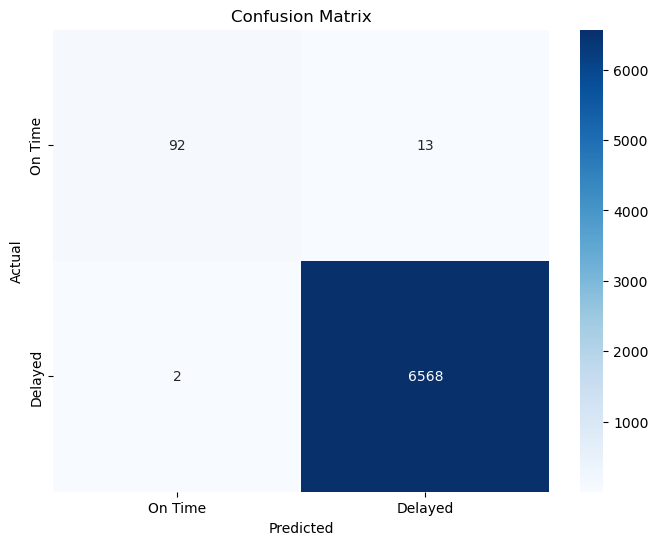

<Figure size 640x480 with 0 Axes>

In [40]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=['On Time', 'Delayed'], yticklabels=['On Time', 'Delayed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#saving the plot in the folder 'reports/figures'
plt.savefig('../reports/figures/confusion_matrix.png')

## Evaluating Model Coeficients

In [41]:
# Evaluating the model coeficient's
coef = model.named_steps['classifier'].coef_[0]

In [42]:
# Getting the feature names after preprocessing
feature_names = model.named_steps['preprocessor'].get_feature_names_out(X_train.columns)

In [43]:
# Creating a DataFrame to display the coefficients with their corresponding feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

In [44]:
coef_df

,Feature,Coefficient,Abs_Coefficient
7,num__boarding_duration,8.614877,8.614877
15,num__deboarding_to_boarding_duration,5.162125,5.162125
0,num__delay_minutes,3.458201,3.458201
6,num__bags_loading_duration,3.057132,3.057132
8,num__offblock_duration,1.760875,1.760875
1,num__deboarding_duration,1.728553,1.728553
3,num__refueling_duration,1.323026,1.323026
11,num__inblock_to_refueling_duration,1.269392,1.269392
16,num__boarding_to_door_close_duration,1.219100,1.219100
10,num__inblock_to_cleaning_duration,1.102995,1.102995


## Explaining the model using SHAP

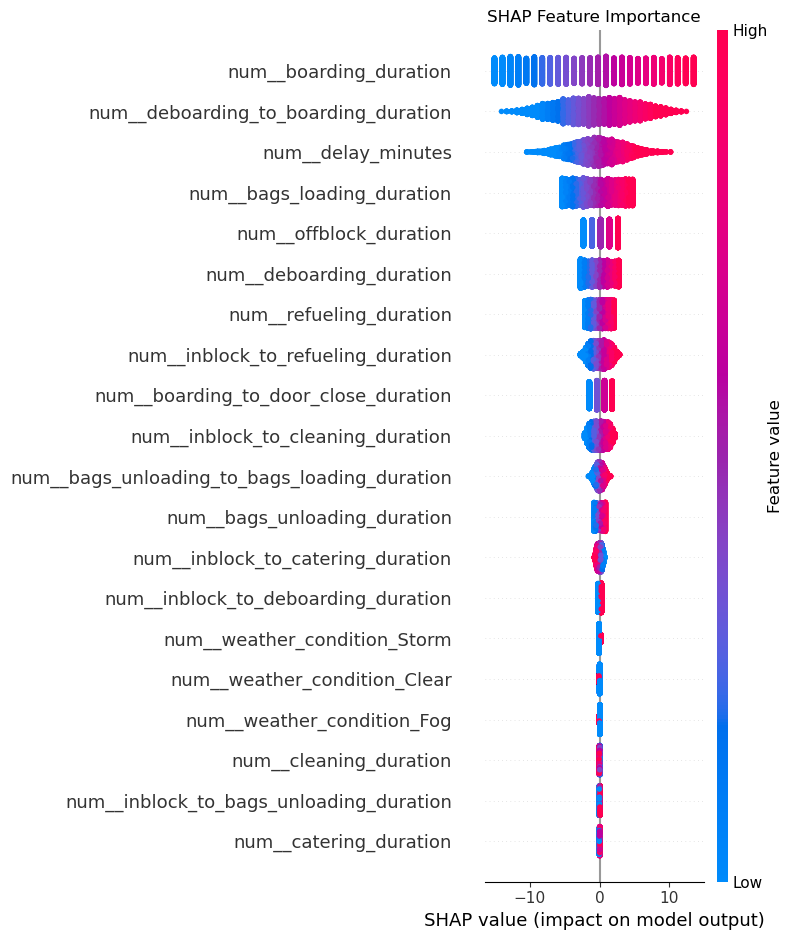

In [45]:
# creating an explainer for the trained model
explainer = shap.LinearExplainer(model.named_steps['classifier'], model.named_steps['preprocessor'].transform(X_train),feature_names=feature_names)

# Calculating SHAP values for the test set
shap_values = explainer.shap_values(model.named_steps['preprocessor'].transform(X_test))

# Creating a summary plot of SHAP values
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, features=model.named_steps['preprocessor'].transform(X_test), feature_names=feature_names, show = False)
plt.title('SHAP Feature Importance')
plt.tight_layout()
plt.show()